In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df=pd.read_csv('insurance.csv')

In [101]:
df.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [102]:
# Map for 'sex' column
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Map for 'smoker' column
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Map for 'region' column
df['region'] = df['region'].map({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4})



In [113]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X=df.drop(  ['charges'],axis=1)
y=df['charges']

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [ ]:


from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)


In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
print(knn.predict(sc.transform([[20,1,21,0,0,1]])))

[3917.68872]


C:\Users\sayed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sayed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [109]:
print(knn.predict(sc.transform([[19,1,21,0,0,2]])))

[3844.4997]


C:\Users\sayed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sayed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [110]:
y_pred =knn.predict(X_test)
# Convert y_pred and y_test to NumPy arrays and reshape them
y_pred_reshaped = y_pred.reshape(len(y_pred), 1)
y_test_reshaped = y_test.to_numpy().reshape(len(y_test), 1)  # or y_test.values.reshape(len(y_test), 1)

# Concatenate the predictions and true values along the columns (axis=1)
result = np.concatenate((y_pred_reshaped, y_test_reshaped), axis=1)

print(result)

[[ 3844.4997    9095.06825 ]
 [ 3917.68872   5272.1758  ]
 [ 3844.4997   29330.98315 ]
 [ 3844.4997    9301.89355 ]
 [ 3917.68872  33750.2918  ]
 [ 3917.68872   4536.259   ]
 [ 3917.68872   2117.33885 ]
 [ 3844.4997   14210.53595 ]
 [ 3844.4997    3732.6251  ]
 [ 3844.4997   10264.4421  ]
 [ 3844.4997   18259.216   ]
 [ 3844.4997    7256.7231  ]
 [ 3917.68872   3947.4131  ]
 [ 3917.68872  46151.1245  ]
 [ 3917.68872  48673.5588  ]
 [ 3917.68872  44202.6536  ]
 [ 3917.68872   9800.8882  ]
 [ 3917.68872  42969.8527  ]
 [ 3917.68872   8233.0975  ]
 [ 3917.68872  21774.32215 ]
 [ 3844.4997    5080.096   ]
 [ 3844.4997    7441.501   ]
 [ 3917.68872   1256.299   ]
 [ 3917.68872   2755.02095 ]
 [ 3844.4997   11085.5868  ]
 [ 3844.4997   10923.9332  ]
 [ 3917.68872  12644.589   ]
 [ 3917.68872  18804.7524  ]
 [ 3844.4997    9715.841   ]
 [ 3917.68872   1131.5066  ]
 [ 3917.68872  15828.82173 ]
 [ 3844.4997   11842.62375 ]
 [ 3917.68872   2020.5523  ]
 [ 3844.4997    5693.4305  ]
 [ 3917.68872 

C:\Users\sayed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R-squared for regression evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 9711.596701340795
Mean Squared Error: 229981715.74225226
R-squared: -0.568510153911973


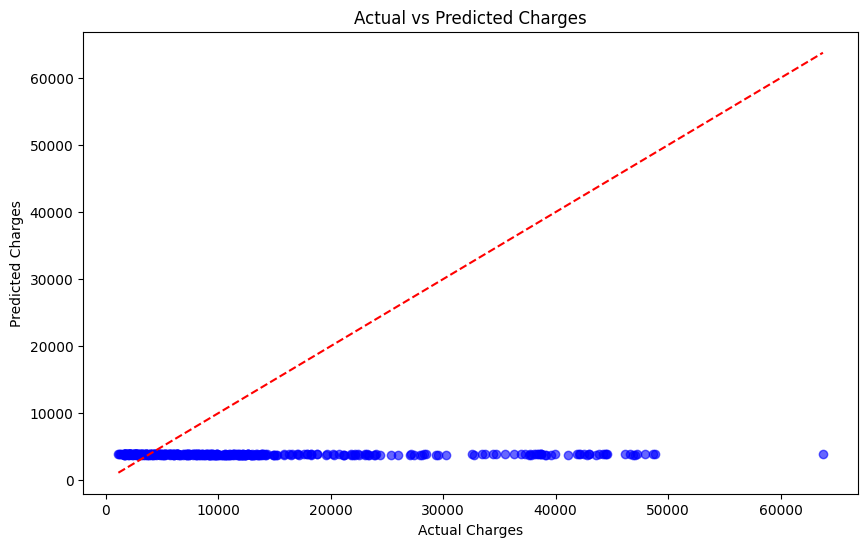

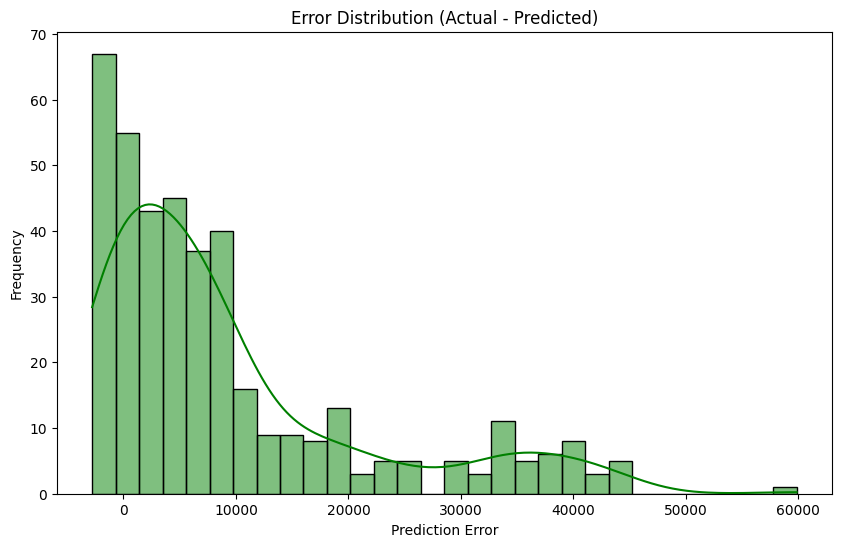

In [112]:

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Error Distribution Plot
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='green', bins=30)
plt.title('Error Distribution (Actual - Predicted)')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()
